# Survey Analysis for KidsOutAndAbout Summer Survey

In [20]:
#imports

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Eclipse Analysis

In [21]:
#Read in the file containing eclipse information

eclipse = pd.read_csv("/Users/veronica/Desktop/KOAA Internship/Survey Analysis/Eclipse - Eclipse.csv")
eclipse['excitement'] = eclipse['excitement'].fillna(0)
eclipse['excitement'] = eclipse['excitement'].astype(int)
eclipse['awareness'] = eclipse['awareness'].fillna(0)
eclipse['awareness'] = eclipse['awareness'].astype(int)
eclipse


,location,IP,zip_code,awareness,excitement
0,Ann Arbor - Metro Detroit,35.139.183.163,33811,3,0
1,Ann Arbor - Metro Detroit,73.84.149.11,48009,0,0
2,Ann Arbor - Metro Detroit,69.154.148.33,48043,0,7
3,Ann Arbor - Metro Detroit,67.149.228.140,48072,2,10
4,Ann Arbor - Metro Detroit,68.60.150.102,48072,0,10
...,...,...,...,...,...
7092,Westchester,172.56.161.62,10803,0,7
7093,Westchester,108.14.122.101,10803,0,9
7094,Westchester,74.101.46.123,10803,0,0
7095,Westchester,69.126.110.129,10805,1,1


In [22]:
#Finding average excitement and awareness by zipcode

excitement = eclipse.groupby('zip_code', dropna=False)['excitement'].mean()
awareness = eclipse.groupby('zip_code', dropna=False)['awareness'].mean()

average_eclipse = pd.DataFrame(excitement)
average_eclipse['awareness'] = awareness
average_eclipse


,excitement,awareness
zip_code,,
00604,8.0,1.0
00614,7.0,0.0
006470,0.0,0.0
010140,0.0,3.0
01022,8.0,0.0
...,...,...
v3g 3c5,8.0,2.0
v4c 7l4,5.0,2.0
v4w2t2,10.0,3.0


Excitement was measured on a 0-10 scale, where 0 is not excited at all/left it blank and 10 is very excited.

Awareness was encoded as the following:

0 = First time hearing about the eclipse/other/left blank

1 = Might've heard about the eclipse from some where before

2 = Aware of the eclipse but had not made any plans for it

3 = Very aware of the eclipse and  planning to travel to view it

In [24]:
#Finding overall average for eclipse awarenss and excitement

excitement_mean = eclipse['excitement'].mean()
excitement_mid = eclipse['excitement'].median()
print("Average excitement for eclipse:", excitement_mean)
print("Median excitement for eclipse:", excitement_mid)


awareness_mean = eclipse['awareness'].mean()
awareness_mid = eclipse['awareness'].median()
print("Average awareness for eclipse:", awareness_mean)
print("Median awareness for eclipse:", awareness_mid)



Average excitement for eclipse: 6.789488516274482
Median excitement for eclipse: 8.0
Average awareness for eclipse: 0.9127800479075666
Median awareness for eclipse: 0.0


These results tell us that generally people are first hearing of the eclipse through the survey, and are pretty excited to hear about the eclipse. 

In [25]:
location = eclipse['location'].unique()
location = (['Ann Arbor - Metro Detroit', 'Atlanta', 'Austin', 'Buffalo - Area',
                  'Capital District - Albany', 'Charlotte', 'DC Metro Area','Dallas',
                  'Denver', 'Fairfield County', 'Fort Worth Area',
                  'Hartford', 'Houston', 'Hudson Valley', 'Indianapolis',
                  'Inland Empire', 'Jacksonville', 'Kansas City', 'Long Island',
                  'Los Angeles', 'Memphis', 'Milwaukee', 'Minneapolis St. Paul',
                  'Nashville', 'Orange County', 'Philadelphia', 'Phoenix',
                  'Pittsburgh', 'Portland', 'Providence', 'Research Triangle',
                  'Rochester', 'Salt Lake City', 'San Antonio', 'San Diego',
                  'San Fernando Valley', 'San Francisco', 'San Jose', 'Seattle',
                  'St. Louis', 'Tampa', 'Toronto', 'Vancouver', 'Westchester'])

In [26]:
#Finding average excitement and awareness by location

excitement = eclipse.groupby('location', dropna=False)['excitement'].mean()
awareness = eclipse.groupby('location', dropna=False)['awareness'].mean()

average_eclipse_location = pd.DataFrame(excitement)

average_eclipse_location['awareness'] = awareness
average_eclipse_location['location'] = location
average_eclipse_location


,excitement,awareness,location
location,,,
Ann Arbor - Metro Detroit,6.710744,0.702479,Ann Arbor - Metro Detroit
Atlanta,6.500000,0.520000,Atlanta
Austin,6.903226,1.092166,Austin
Buffalo - Area,7.176282,1.522436,Buffalo - Area
Capital District - Albany,6.612903,0.729032,Capital District - Albany
Charlotte,6.687273,0.505455,Charlotte
DC Metro Area,6.342466,0.630137,DC Metro Area
Dallas,6.719298,0.818713,Dallas
Denver,6.804469,0.441341,Denver


The graphs below show us a visualization of average excitement and awareness of the eclipse for the eclipse for each city that was a part of the city.

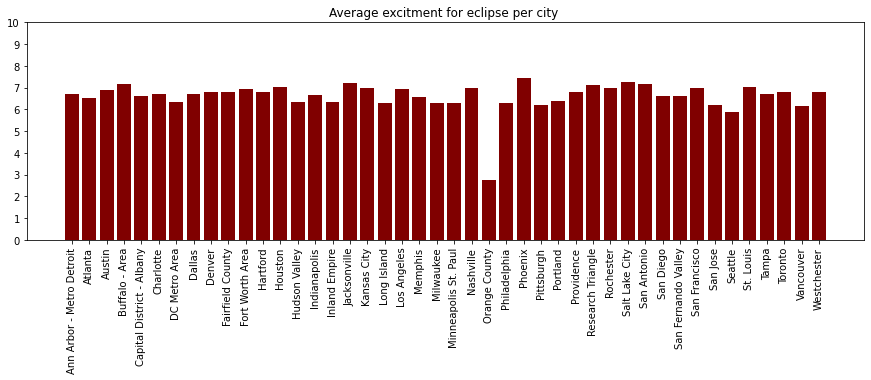

In [27]:
#Visualization of average excitement for the eclipse per city

plt.figure(figsize=(15,4))
plt.bar(average_eclipse_location['location'],average_eclipse_location['excitement'], color = "maroon")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 11))
plt.title("Average excitment for eclipse per city ")
plt.show()

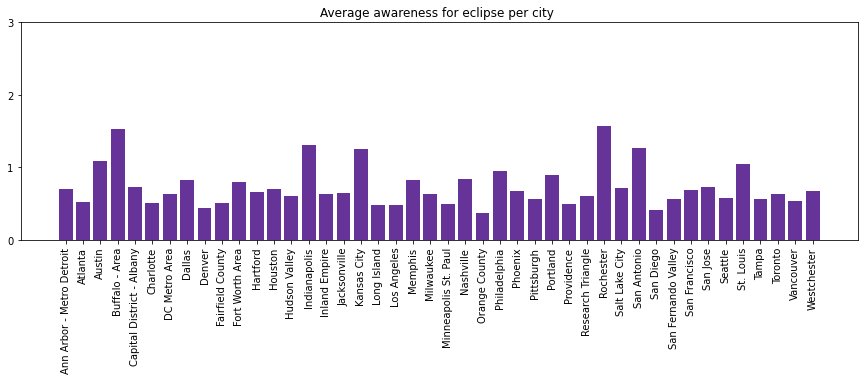

In [28]:
#Visualization of average awareness for the eclipse per city

plt.figure(figsize=(15,4))
plt.bar(average_eclipse_location['location'],average_eclipse_location['awareness'], color = "rebeccapurple")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 4))
plt.title("Average awareness for eclipse per city ")
plt.show()

### Demographic - Person Analysis

In [40]:
#Read in the file containing information about the survey's demographic and some clean up

demographic = pd.read_csv("/Users/veronica/Desktop/KOAA Internship/Survey Analysis/Demographic.csv")

demographic['Facebook'] = demographic['Facebook'].fillna(0)
demographic['Twitter'] = demographic['Twitter'].fillna(0)
demographic['Pinterest'] = demographic['Pinterest'].fillna(0)
demographic['Instagram'] = demographic['Instagram'].fillna(0)

demographic['Facebook'] = demographic['Facebook'].astype(int)
demographic['Twitter'] = demographic['Twitter'].astype(int)
demographic['Pinterest'] = demographic['Pinterest'].astype(int)
demographic['Instagram'] = demographic['Instagram'].astype(int)

demographic.fillna("N/A")

demographic



,Location,IP,zip_code,Who,Age,Sex,Facebook,Twitter,Pinterest,Instagram
0,Ann Arbor - Metro Detroit,69.154.148.33,48043,Other,50-59,Female,0,0,0,0
1,Ann Arbor - Metro Detroit,67.149.228.140,48072,Parent,30-39,Female,3,0,3,4
2,Ann Arbor - Metro Detroit,68.60.150.102,48072,Parent,30-39,Female,3,0,1,3
3,Ann Arbor - Metro Detroit,74.199.86.224,48073,Parent,40-49,Female,4,0,2,3
4,Ann Arbor - Metro Detroit,67.149.169.84,48073,Parent,30-39,Female,4,0,2,4
...,...,...,...,...,...,...,...,...,...,...
8116,Westchester,68.132.195.148,10803,Parent,Under 18,Male,0,0,0,3
8117,Westchester,172.56.161.62,10803,Caregiver,18 - 29,Female,4,0,0,4
8118,Westchester,74.101.46.123,10803,Parent,30 - 39,Female,4,0,2,4
8119,Westchester,69.126.110.129,10805,Caregiver,40 - 49,Female,3,1,1,3


In [41]:
#Finding the most common respondent to the survey using frequency of answer (mode response)

Who = demographic.groupby(['Location'])['Who'].agg(pd.Series.mode)
Age = demographic.groupby(['Location'])['Age'].agg(pd.Series.mode)
Sex = demographic.groupby(['Location'])['Sex'].agg(pd.Series.mode)

average_person = pd.DataFrame(Who)
average_person['Age'] = Age
average_person['Sex'] = Sex

average_person


,Who,Age,Sex
Location,,,
Ann Arbor - Metro Detroit,Parent,60-69,Female
Atlanta,Parent,40-49,Female
Austin,Parent,30-39,Female
Buffalo - Area,Parent,30-39,Female
Capital District - Albany,Parent,40-49,Female
Charlotte,Parent,60-69,Female
DC Metro Area,Parent,40-49,Female
Dallas,Parent,40-49,Female
Denver,Parent,30-39,Female


There was more variation with in the dataset as a whole but, from the table above, we can see that parents (usually moms) between 30-49 are the demographic of people that typically answer the survey. This makes sense as it is usually parents that are curious what summer activities are best for their children. 

### Demographic - Social Media Analysis

Use of social media has been encoded as the following:

0 = Never uses/left blank

1 = Rarely uses

2 = 1-2 times a week

3 = Most days

4 = Everyday

In [31]:
#Finding average social media use by zipcode

Facebook = demographic.groupby('zip_code', dropna=False)['Facebook'].mean()
Twitter = demographic.groupby('zip_code', dropna=False)['Twitter'].mean()
Pinterest = demographic.groupby('zip_code', dropna=False)['Pinterest'].mean()
Instagram = demographic.groupby('zip_code', dropna=False)['Instagram'].mean()

average_demo = pd.DataFrame(Facebook)
average_demo['Twitter'] = Twitter
average_demo['Pinterest'] = Pinterest
average_demo['Instagram'] = Instagram

average_demo


,Facebook,Twitter,Pinterest,Instagram
zip_code,,,,
10001,3.0,2.0,2.0,3.0
10003,2.0,0.0,2.0,2.0
10018,2.0,1.0,1.0,2.0
10019,3.0,2.0,4.0,2.0
10024,4.0,4.0,0.0,4.0
...,...,...,...,...
v4a-8t3,3.0,0.0,0.0,0.0
v4c 7l4,2.0,0.0,0.0,1.0
v4w2t2,4.0,0.0,1.0,0.0


In [33]:
#Finding overall average for social media use 

facebook_mean = average_demo['Facebook'].mean()
print("Average Facebook use:", facebook_mean)

twitter_mean = average_demo['Twitter'].mean()
print("Average Twitter use:", twitter_mean)

pinterest_mean = average_demo['Pinterest'].mean()
print("Average Pinterest use:", pinterest_mean)

instagram_mean = average_demo['Instagram'].mean()
print("Average Instagram use:", instagram_mean)



Average Facebook use: 2.8366150627721067
Average Twitter use: 0.8383414129986232
Average Pinterest use: 1.2181950131863577
Average Instagram use: 2.1029450376801138


These results tell us that, overall, the people that answered this survey tend to not use social media that much, but when they do they tend to favor Facebook.

In [34]:
#Making a location column so we can use it for the graphs below

location = (['Ann Arbor - Metro Detroit', 'Atlanta', 'Austin', 'Buffalo - Area',
                  'Capital District - Albany', 'Charlotte', 'DC Metro Area','Dallas',
                  'Denver', 'Fairfield County', 'Fort Worth Area',
                  'Hartford', 'Houston', 'Hudson Valley', 'Indianapolis',
                  'Inland Empire', 'Jacksonville', 'Kansas City', 'Long Island',
                  'Los Angeles', 'Memphis', 'Milwaukee', 'Minneapolis St. Paul',
                  'Nashville', 'Orange County', 'Philadelphia', 'Phoenix',
                  'Pittsburgh', 'Portland', 'Providence', 'Research Triangle',
                  'Rochester', 'Salt Lake City', 'San Antonio', 'San Diego',
                  'San Fernando Valley', 'San Francisco', 'San Jose', 'Seattle',
                  'St. Louis', 'Tampa', 'Toronto', 'Vancouver', 'Westchester'])

In [35]:
#Finding average social media use by location

Facebook = demographic.groupby('Location', dropna=False)['Facebook'].mean()
Twitter = demographic.groupby('Location', dropna=False)['Twitter'].mean()
Pinterest = demographic.groupby('Location', dropna=False)['Pinterest'].mean()
Instagram = demographic.groupby('Location', dropna=False)['Instagram'].mean()

average_demo_location = pd.DataFrame(Facebook)
average_demo_location['Twitter'] = Twitter
average_demo_location['Pinterest'] = Pinterest
average_demo_location['Instagram'] = Instagram
average_demo_location['location'] = location

average_demo_location

,Facebook,Twitter,Pinterest,Instagram,location
Location,,,,,
Ann Arbor - Metro Detroit,2.687500,0.621324,1.080882,1.713235,Ann Arbor - Metro Detroit
Atlanta,2.969231,0.553846,1.430769,2.323077,Atlanta
Austin,2.677551,0.836735,1.310204,2.506122,Austin
Buffalo - Area,2.944444,0.815789,0.938596,1.941520,Buffalo - Area
Capital District - Albany,2.662983,0.690608,1.000000,1.629834,Capital District - Albany
Charlotte,2.044728,0.642173,1.130990,1.287540,Charlotte
DC Metro Area,3.246914,0.864198,1.246914,2.148148,DC Metro Area
Dallas,2.610256,0.851282,1.158974,2.287179,Dallas
Denver,2.740741,0.788360,1.259259,1.862434,Denver


The graphs visualize the average use of each social media of survey respondents by city

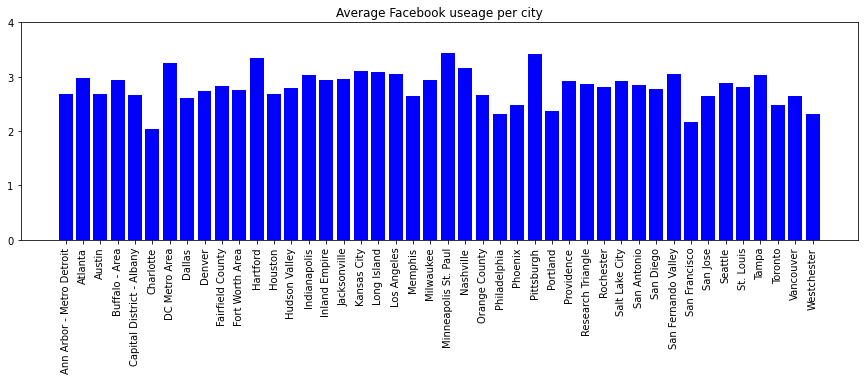

In [36]:
#Visualization of average Facebook useage per city

plt.figure(figsize=(15,4))
plt.bar(average_demo_location['location'],average_demo_location['Facebook'], color = "blue")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 5))
plt.title("Average Facebook useage per city")
plt.show()

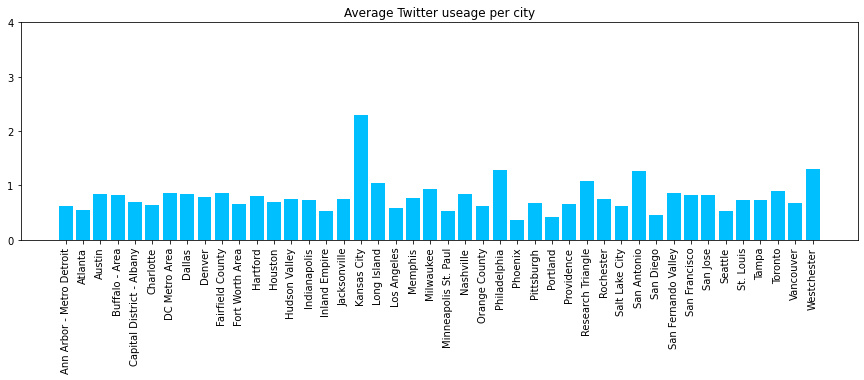

In [37]:
#Visualization of average Twitter useage per city

plt.figure(figsize=(15,4))
plt.bar(average_demo_location['location'],average_demo_location['Twitter'], color = "deepskyblue")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 5))
plt.title("Average Twitter useage per city")
plt.show()

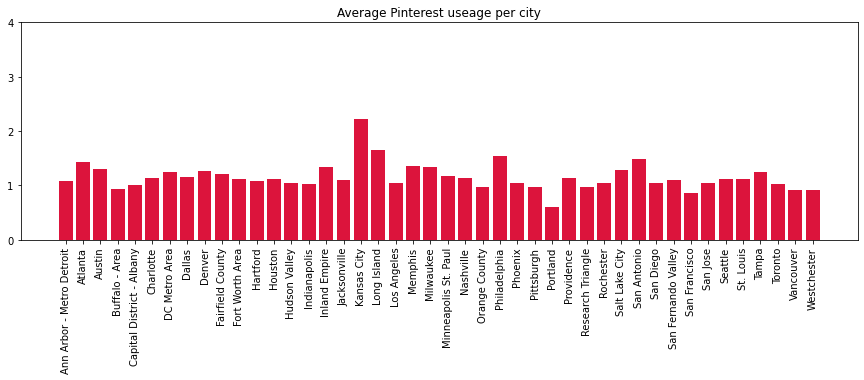

In [38]:
#Visualization of average Pinterest useage per city

plt.figure(figsize=(15,4))
plt.bar(average_demo_location['location'],average_demo_location['Pinterest'], color = "crimson")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 5))
plt.title("Average Pinterest useage per city")
plt.show()

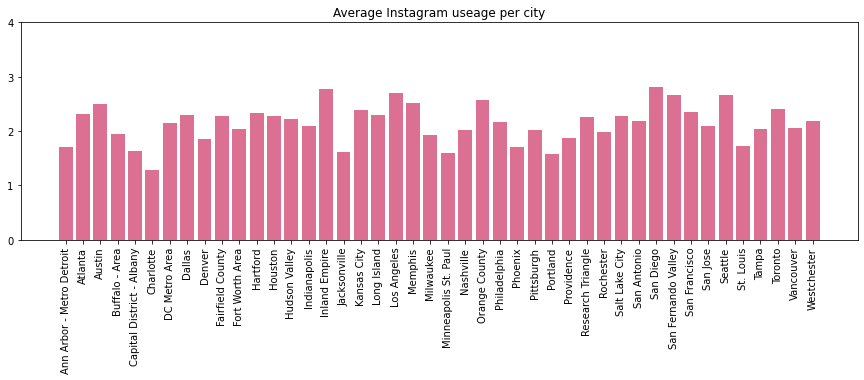

In [39]:
#Visualization of average Instagram useage per city

plt.figure(figsize=(15,4))
plt.bar(average_demo_location['location'],average_demo_location['Instagram'], color = "palevioletred")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 5))
plt.title("Average Instagram useage per city")
plt.show()